<a href="https://colab.research.google.com/github/muscak/Master-Machine-Learning-Algorithms/blob/master/Nonlinear-Algorithms/Support-Vector-Machines/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines (SVM)

In machine learning, support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis [1].

## Table of Contents

## Introduction<a id='intro'></a>

Basic SVM as described in this chapter is intended for binary classification problems. Although, extensions have been developed for regression and multiclass classification.

## Import Libraries<a id='libraries'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
sb.set_style('whitegrid')
import matplotlib.pyplot as plt

## Create Sample Data<a id='sample'></a>

The dataset contains two input variables ($x_1$ and $x_2$) and the class output variable with the values -1 and 1. The dataset contains 10 records, 5 that belong to each class.

In [2]:
x1 = [2.327868056, 3.032830419, 4.485465382, 3.684815246, 2.283558563, 
      7.807521179, 6.132998136, 7.514829366, 5.502385039, 7.432932365]
x2 = [2.458016525, 3.170770366, 3.696728111, 3.846846973, 1.853215997, 
      3.290132136, 2.140563087, 2.107056961, 1.404002608, 4.236232628]
y = [-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]

df = pd.DataFrame(zip(x1, x2, y), columns=['x1', 'x2', 'y'])
df

,x1,x2,y
0,2.327868,2.458017,-1
1,3.032830,3.170770,-1
2,4.485465,3.696728,-1
3,3.684815,3.846847,-1
4,2.283559,1.853216,-1
5,7.807521,3.290132,1
6,6.132998,2.140563,1
7,7.514829,2.107057,1
8,5.502385,1.404003,1
9,7.432932,4.236233,1


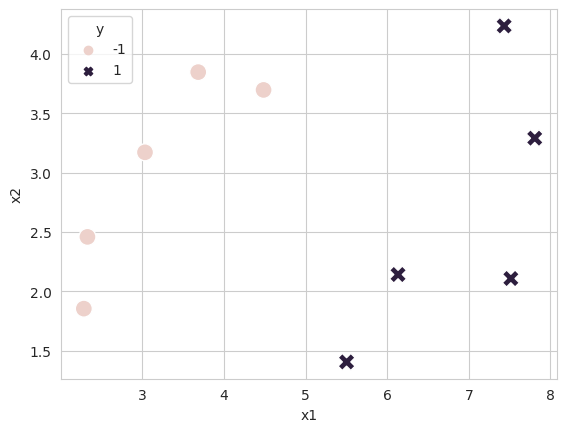

In [3]:
sb.scatterplot(data=df, x='x1', y='x2', hue='y', style='y', s=150)
plt.show()

## Manual Implementation<a id='manual'></a>

In [49]:
epoch = 16

# Set the initial weights
b1 = 0
b2 = 0

lr = 0.45 

df_train = pd.DataFrame(columns=['x1', 'x2', 'y', 'b1', 'b2', 'output', 
                                 'prediction', 'sharp', 'error'])
accuracy = []

for i in range(0, epoch):
  df_temp = df.copy()
  df_train = pd.concat([df_train, df_temp], ignore_index=True)

df_train.loc[0, 'b1'] = b1
df_train.loc[0, 'b2'] = b2

for j in range(0, len(df_train)):
  df_train.loc[j, 'output'] = df_train.loc[j, 'y'] * ((df_train.loc[j, 'b1'] * df_train.loc[j, 'x1']) + (df_train.loc[j, 'b2'] * df_train.loc[j, 'x2']))
  if(j+1 < len(df_train)):
    if(df_train.loc[j, 'output'] < 1):
      df_train.loc[j+1, 'b1'] = (1 - 1/(j+1)) * df_train.loc[j, 'b1'] + (1/(lr*(j+1))) * df_train.loc[j, 'y'] * df_train.loc[j, 'x1']
      df_train.loc[j+1, 'b2'] = (1 - 1/(j+1)) * df_train.loc[j, 'b2'] + (1/(lr*(j+1))) * df_train.loc[j, 'y'] * df_train.loc[j, 'x2']
    else:
      df_train.loc[j+1, 'b1'] = (1 - 1/(j+1)) * df_train.loc[j, 'b1']
      df_train.loc[j+1, 'b2'] = (1 - 1/(j+1)) * df_train.loc[j, 'b2']

df_train['prediction'] = (df_train['b1'] * df_train['x1']) + (df_train['b2'] * df_train['x2'])
df_train.loc[df_train['prediction'] < 0, 'sharp'] = -1
df_train.loc[df_train['prediction'] >= 0, 'sharp'] = 1

df_train.loc[df_train['sharp'] == df_train['y'], 'error'] = 0
df_train.loc[df_train['sharp'] != df_train['y'], 'error'] = 1

l = 0
for k in range(0, epoch):
  df_temp = df_train.loc[l:l+len(df)-1,].copy()
  acc = (1 - (df_temp['error'].sum() / len(df))) * 100
  accuracy.append(acc)
  l += len(df) - 1


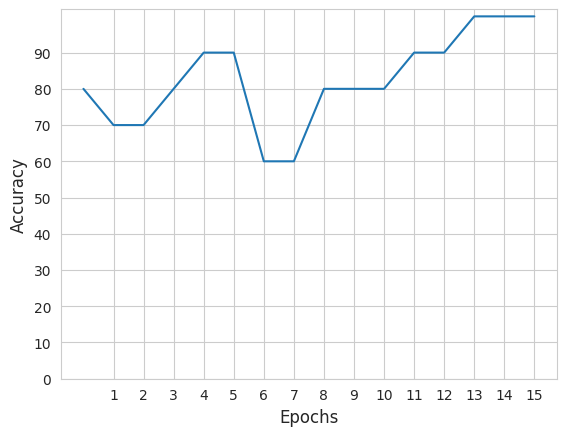

In [72]:
x_ticks = np.arange(start=1, stop=16, step=1)
y_ticks = np.arange(start=0, stop=100, step=10)
plt.plot(accuracy)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.show()

## Prediction

In [64]:
b1 = df_train['b1'].iloc[-1]
b2 = df_train['b2'].iloc[-1]

In [87]:
df_prediction = df.copy()

In [89]:
df_prediction['output'] = b1*df_prediction['x1'] + b2*df_prediction['x2']
df_prediction.loc[df_prediction['output'] < 0, 'sharp'] = -1
df_prediction.loc[df_prediction['output'] >= 0, 'sharp'] = 1

df_prediction.loc[df_prediction['sharp'] == df_prediction['y'], 'error'] = 0
df_prediction.loc[df_prediction['sharp'] != df_prediction['y'], 'error'] = 1

acc = (1 - (df_prediction['error'].sum() / len(df))) * 100

print('Accuracy: {:.0f}%'.format(acc))

Accuracy: 100%


In [95]:
from sklearn.datasets import make_classification
x, y = make_classification(
    n_samples=100, # 1000 observations 
    n_features=2, # 5 total features
    n_informative=2, # 3 'useful' features
    n_redundant=0,
    n_classes=2, # binary target/label 
    random_state=101 # if you want the same results as mine
)

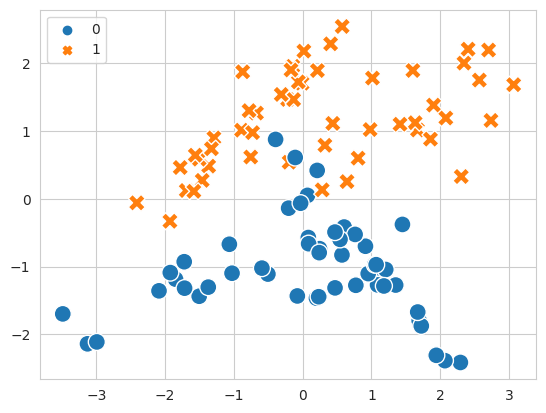

In [99]:
sb.scatterplot(x=x[:,0], y=x[:,1], hue=y, style=y, s=150)
plt.show()

array([2.40710326, 2.2038783 ])

## Conclusion<a id='conclusion'></a>

## References
---

[1] [Support vector machine](https://en.wikipedia.org/wiki/Support_vector_machine)